<a href="https://colab.research.google.com/github/summerolmstead/LoanApprovalLogisticRegression/blob/main/CS4180Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Summer Olmstead**

*Classification Model - Binomial Logistic Regression Loan Approval*

Logistic regression is used for binary classification where we use sigmoid function, that takes input as independent variables and produces a probability value between 0 and 1. https://www.geeksforgeeks.org/understanding-logistic-regression/


**Assumptions of Logistic Regressions:**


Independent observations: Each observation is independent of the other. meaning there is no correlation between any input variables.


Binary dependent variables: It takes the assumption that the dependent variable must be binary or dichotomous, meaning it can take only two values. For more than two categories SoftMax functions are used.


Linearity relationship between independent variables and log odds: The relationship between the independent variables and the log odds of the dependent variable should be linear.


No outliers: There should be no outliers in the dataset.


Large sample size: The sample size is sufficiently large

Terminology for Lostigic Regressions:

Odds: It is the ratio of something occurring to something not occurring. it is different from probability as the probability is the ratio of something occurring to everything that could possibly occur.

Log-odds: The log-odds, also known as the logit function, is the natural logarithm of the odds. In logistic regression, the log odds of the dependent variable are modeled as a linear combination of the independent variables and the intercept.

Dataset from Kaggle on Loan Approval: https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data?resource=download  | 45k

Loan Dataset info from Kaggle:

**Column | 	Description |	Type**


**person_age** -	Age of the person	- Float


**person_gender** - Gender of the person -	Categorical


**person_education** -	Highest education level	- Categorical


**person_income**	- Annual income -	Float


**person_emp_exp** - Years of employment experience	- Integer


**person_home_ownership**	- Home ownership status (e.g., rent, own, mortgage)	- Categorical


**loan_amnt**	- Loan amount requested	- Float


**loan_intent**	- Purpose of the loan -	Categorical


**loan_int_rate**	Loan interest rate- Float


**loan_percent_income**	- Loan amount as a percentage of annual income - Float


**cb_person_cred_hist_length**	- Length of credit history in years	- Float


**credit_score** -	Credit score of- Indicator of previous loan defaults	- Categorical


**loan_status** (target variable)	- Loan approval status: 1 = approved; 0 = rejected	- Integer

# **Basic Overview of Dataset + Importing**

In [203]:
from google.colab import drive #mounting so I do not have to keep uploading dataset
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [204]:
import pandas as pd

file_path = '/content/drive/MyDrive/CS4180/loan_data.csv'  #dataset from kaggle ( link above )

df = pd.read_csv(file_path)

#display the DataFrame head to see general characteristics
print(df.head())   #this is the original df

   person_age person_gender person_education  person_income  person_emp_exp  \
0          22        female           Master          71948               0   
1          21        female      High School          12282               0   
2          25        female      High School          12438               3   
3          23        female         Bachelor          79753               0   
4          24          male           Master          66135               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT      35000    PERSONAL          16.02   
1                   OWN       1000   EDUCATION          11.14   
2              MORTGAGE       5500     MEDICAL          12.87   
3                  RENT      35000     MEDICAL          15.23   
4                  RENT      35000     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                           3           561  

So just from looking at the head - its obvious we need to change gender to binary to manipulate it. We also need to scale the loan_intent,person home ownership, and person education to be one hot encoded or values 1-4 perhaps. We need to make previous loan on file to be a binary variable for yes(1)/no(0). Loan_Status is already a yes or no binary so this is great!

In [205]:
#lets look more into the dataset
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [206]:
df.shape # we have 45k observations very cool!

(45000, 14)

# **Data Cleaning Process**

Lets do **Data Cleaning** now!

First, lets look for duplicates

In [207]:
df_clean1 = df.drop_duplicates() #drop duplicates
df_clean1.shape #lets see if any dropped ok none bc there is still 45k values lol

(45000, 14)

In [208]:
df_clean1.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22,female,Master,71948,0,RENT,35000,PERSONAL,16.02,0.49,3,561,No,1
1,21,female,High School,12282,0,OWN,1000,EDUCATION,11.14,0.08,2,504,Yes,0
2,25,female,High School,12438,3,MORTGAGE,5500,MEDICAL,12.87,0.44,3,635,No,1
3,23,female,Bachelor,79753,0,RENT,35000,MEDICAL,15.23,0.44,2,675,No,1
4,24,male,Master,66135,1,RENT,35000,MEDICAL,14.27,0.53,4,586,No,1


In [209]:
df_clean1.isnull().sum() #no nan values!

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


Ok we now need to change person_gender column to have values of 1 if female and 0 if male. We need to see how many different education levels there are and classify them in ascendng order as they increase! Same principle for person_home_ownership and loan_intent. For previous_loan_on_file we need to change no = 0 and yes = 1.

In [210]:
#ONE HOT ENCODE ALL CATEGORICAL VARIABLES!
df_clean2 = df_clean1.copy()
df_clean2 = pd.get_dummies(df_clean1, columns=['person_gender', 'person_education', 'person_home_ownership', 'loan_intent','previous_loan_defaults_on_file'])

#convert boolean True/False to 1/0
df_clean2 = df_clean2.astype(int)

print(df_clean2.head())

   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0          22          71948               0      35000             16   
1          21          12282               0       1000             11   
2          25          12438               3       5500             12   
3          23          79753               0      35000             15   
4          24          66135               1      35000             14   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0                    0                           3           561            1   
1                    0                           2           504            0   
2                    0                           3           635            1   
3                    0                           2           675            1   
4                    0                           4           586            1   

   person_gender_female  person_gender_male  person_education_Associ

In [211]:
#realized should make sure assumption of no outliers is true so lets make sure with income everything else feels like it makes sense to keep as is
from scipy.stats import zscore

df_clean3 = df_clean2.copy()

# z-score function from scipy to the 'person_income' column only
z_scores_income = zscore(df_clean3['person_income'])

# outliers, Z-scores > 3 or < -3
outliers_income = (z_scores_income > 3) | (z_scores_income < -3)

#print rows with outliers in 'person_income' to see if any there......
outlier_rows_income = df_clean3[outliers_income]
print(outlier_rows_income)


       person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
15             23         600891               5      30000             10   
33             25         368115               3      24250             13   
34             26         361076               1       7800             13   
42             26         361293               5      20000              7   
43             23         361547               0      24250             19   
...           ...            ...             ...        ...            ...   
43915          30         736127               5      22079             10   
44008          28         725801               9      25000              9   
44557          38         483809              13      30631             11   
44922          29         726416               7      24890              9   
44947          42         705960              21      20686             10   

       loan_percent_income  cb_person_cred_hist_length  credit_

In [212]:
#removing the outlier rows from 'person_income' .. seems like the income from these rows they are just super rich lol so this may be skewing stuff for income's effect on loan approval
df_clean4 = df_clean3.copy()
df_clean4 = df_clean3[~outliers_income]

In [213]:
#filter rows where 'person_age' is greater than 100
ages_above_100 = df_clean4[df_clean4['person_age'] > 100]

#display the rows with ages above 100... likely from synthetic data 
print(ages_above_100)


     person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
81          144         300616             125       4800             13   
183         144         241424             121       6000             11   
575         123          97140             101      20400             10   
747         123          94723             100      20000             11   

     loan_percent_income  cb_person_cred_hist_length  credit_score  \
81                     0                           3           789   
183                    0                           2           807   
575                    0                           3           805   
747                    0                           4           714   

     loan_status  person_gender_female  person_gender_male  \
81             0                     0                   1   
183            0                     0                   1   
575            0                     1                   0   
747            0    

In [214]:
#filter out rows where 'person_age' is greater than 100
df_clean5 = df_clean4[df_clean4['person_age'] <= 100]


In [215]:
cleaned_df = df_clean5.copy()

print(cleaned_df.head())

   person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0          22          71948               0      35000             16   
1          21          12282               0       1000             11   
2          25          12438               3       5500             12   
3          23          79753               0      35000             15   
4          24          66135               1      35000             14   

   loan_percent_income  cb_person_cred_hist_length  credit_score  loan_status  \
0                    0                           3           561            1   
1                    0                           2           504            0   
2                    0                           3           635            1   
3                    0                           2           675            1   
4                    0                           4           586            1   

   person_gender_female  person_gender_male  person_education_Associ

In [216]:
cleaned_df.shape

(44710, 28)

In [217]:
cleaned_df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_female,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes
count,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.0,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000,44710.000000
mean,27.707851,76883.251532,5.355088,9535.951152,10.486424,0.0,5.841065,632.533482,0.223015,0.448132,0.551868,0.267189,0.297875,0.013733,0.266115,0.155088,0.408633,0.002572,0.065578,0.523216,0.158622,0.203959,0.106195,0.190159,0.167569,0.173496,0.492418,0.507582
std,5.876863,43284.368404,5.892945,6263.550196,3.010800,0.0,3.855856,50.397994,0.416273,0.497308,0.497308,0.442497,0.457329,0.116382,0.441930,0.361993,0.491587,0.050651,0.247546,0.499466,0.365328,0.402943,0.308091,0.392431,0.373487,0.378680,0.499948,0.499948
min,20.000000,8000.000000,0.000000,500.000000,5.000000,0.0,2.000000,390.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,47044.500000,1.000000,5000.000000,8.000000,0.0,3.000000,601.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,66956.000000,4.000000,8000.000000,11.000000,0.0,4.000000,640.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,30.000000,94716.000000,8.000000,12000.000000,12.000000,0.0,8.000000,670.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,94.000000,321399.000000,76.000000,35000.000000,20.000000,0.0,30.000000,784.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So, we need to drop atleast 1 of the categroical variables to see the true effect of the variable. Now we dont want a kitchen sink model so the first question we have is. What variables do we think will actually affect loan status the most? lets start with five only ..... i say we keep gender, credit score, age, loan intent, and previous loan on file maybe!

In [218]:
cleanedfinal_df = cleaned_df.copy()
cleanedfinal_df = cleaned_df.drop(columns=['previous_loan_defaults_on_file_No','person_gender_female','person_home_ownership_RENT','loan_intent_VENTURE','person_education_Master'])#FOR DUMMY VARS WE CANT HAVE ALL CATEGORICAL ANSWERS MUST BE -1
cleanedfinal_df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,previous_loan_defaults_on_file_Yes
0,22,71948,0,35000,16,0,3,561,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,21,12282,0,1000,11,0,2,504,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1
2,25,12438,3,5500,12,0,3,635,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0
3,23,79753,0,35000,15,0,2,675,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
4,24,66135,1,35000,14,0,4,586,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0


# **Cleaned Data Visualizations**

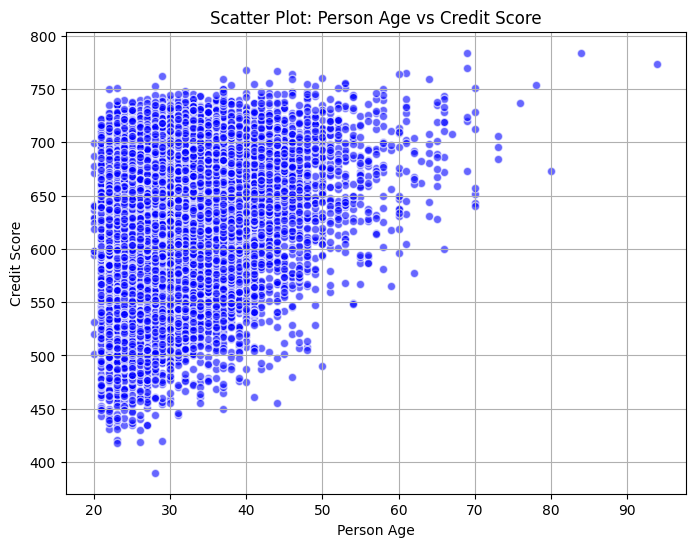

In [219]:
#age and crdit scores can show an interesting relationship probably... especially given years of having bank info could affect someones credit score later on

plt.figure(figsize=(8, 6))
plt.scatter(cleanedfinal_df['person_age'], cleanedfinal_df['credit_score'], alpha=0.6, edgecolors='w', color='b')
plt.title('Scatter Plot: Person Age vs Credit Score')
plt.xlabel('Person Age')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()

# **Model 1**

In [220]:
model1_test_df = cleanedfinal_df.copy()

#columns i wanna keep
columns_to_keep = ['person_gender_male','credit_score','person_age','person_home_ownership_MORTGAGE','person_home_ownership_OTHER','person_home_ownership_OWN','loan_intent_EDUCATION','loan_intent_PERSONAL','loan_intent_MEDICAL','loan_intent_DEBTCONSOLIDATION','loan_intent_HOMEIMPROVEMENT','previous_loan_defaults_on_file_Yes','loan_status']

#only columns i want to keep!
model1_df = model1_test_df[columns_to_keep]

#show the resulting DataFrame
print(model1_df.head())


   person_gender_male  credit_score  person_age  \
0                   0           561          22   
1                   0           504          21   
2                   0           635          25   
3                   0           675          23   
4                   1           586          24   

   person_home_ownership_MORTGAGE  person_home_ownership_OTHER  \
0                               0                            0   
1                               0                            0   
2                               1                            0   
3                               0                            0   
4                               0                            0   

   person_home_ownership_OWN  loan_intent_EDUCATION  loan_intent_PERSONAL  \
0                          0                      0                     1   
1                          1                      1                     0   
2                          0                      0              

In [221]:
#set pandas option to show all columns
pd.set_option('display.max_columns', None)
print(model1_df)

       person_gender_male  credit_score  person_age  \
0                       0           561          22   
1                       0           504          21   
2                       0           635          25   
3                       0           675          23   
4                       1           586          24   
...                   ...           ...         ...   
44995                   1           645          27   
44996                   0           621          37   
44997                   1           668          33   
44998                   1           604          29   
44999                   1           628          24   

       person_home_ownership_MORTGAGE  person_home_ownership_OTHER  \
0                                   0                            0   
1                                   0                            0   
2                                   1                            0   
3                                   0                      

Perfect! We have finally got to the point we can manipulate the data and make our model! Because we are trying to explain loan_approval, 0 or 1. We are going to make a logistic regression! :)

In [222]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#features (X) and target (y , loan_status)
X = model1_df.drop(columns=['loan_status'])  # drop 'loan_status' column for features (all other features are independent vars)
y = model1_df['loan_status']  # target is 'loan_status'(dependent var)

# split data into training and testing sets (80% train, 20% test as standard)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the features (X).... need to do this bc we have multiple different variables on diff scales like age vs income etc
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# initialize the Logistic Regression model
model = LogisticRegression()

# fit the model to the training data
model.fit(X_train_scaled, y_train)

# make predictions on the test set
y_pred = model.predict(X_test_scaled)

# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.8297

Confusion Matrix:
[[6210  731]
 [ 792 1209]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      6941
           1       0.62      0.60      0.61      2001

    accuracy                           0.83      8942
   macro avg       0.76      0.75      0.75      8942
weighted avg       0.83      0.83      0.83      8942



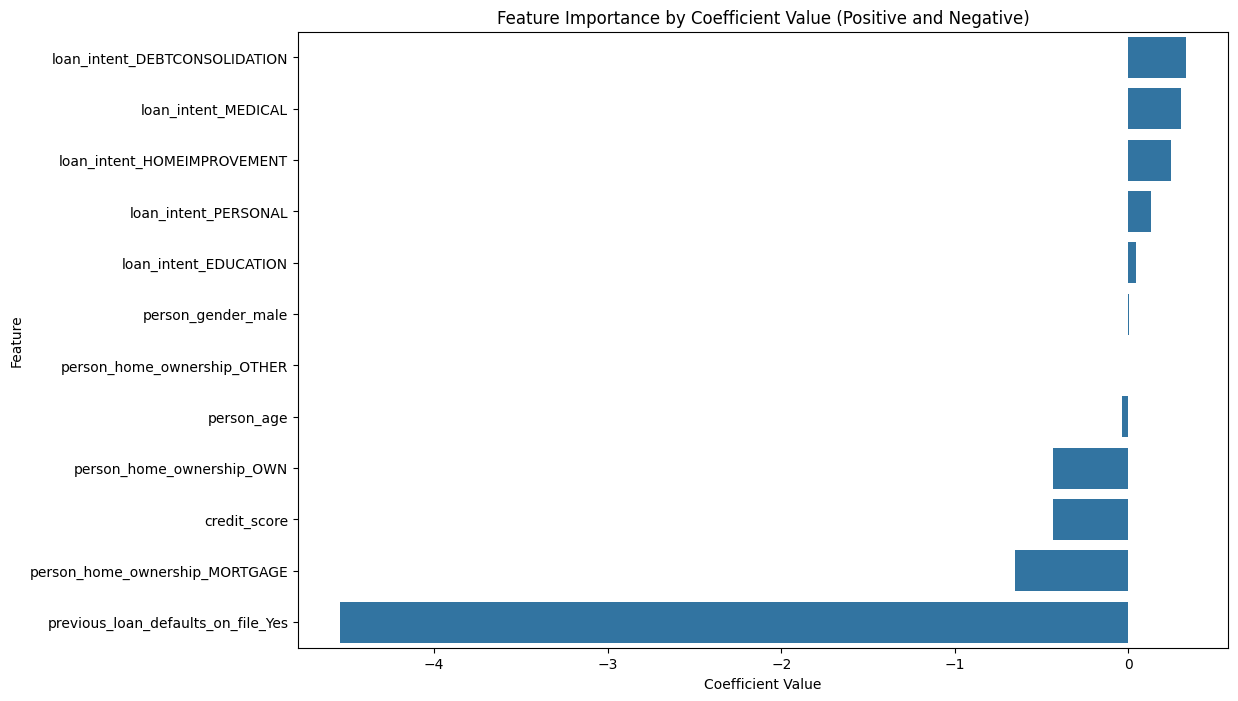

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

#feature names and their corresponding coefficients
feature_names = X.columns
coefficients = model.coef_[0]

#df to hold feature names and coefficients
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# sort by coefficient value
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)

#showing positive and negative coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance by Coefficient Value (Positive and Negative)')
plt.xlabel('Coefficient Value')
plt.show()


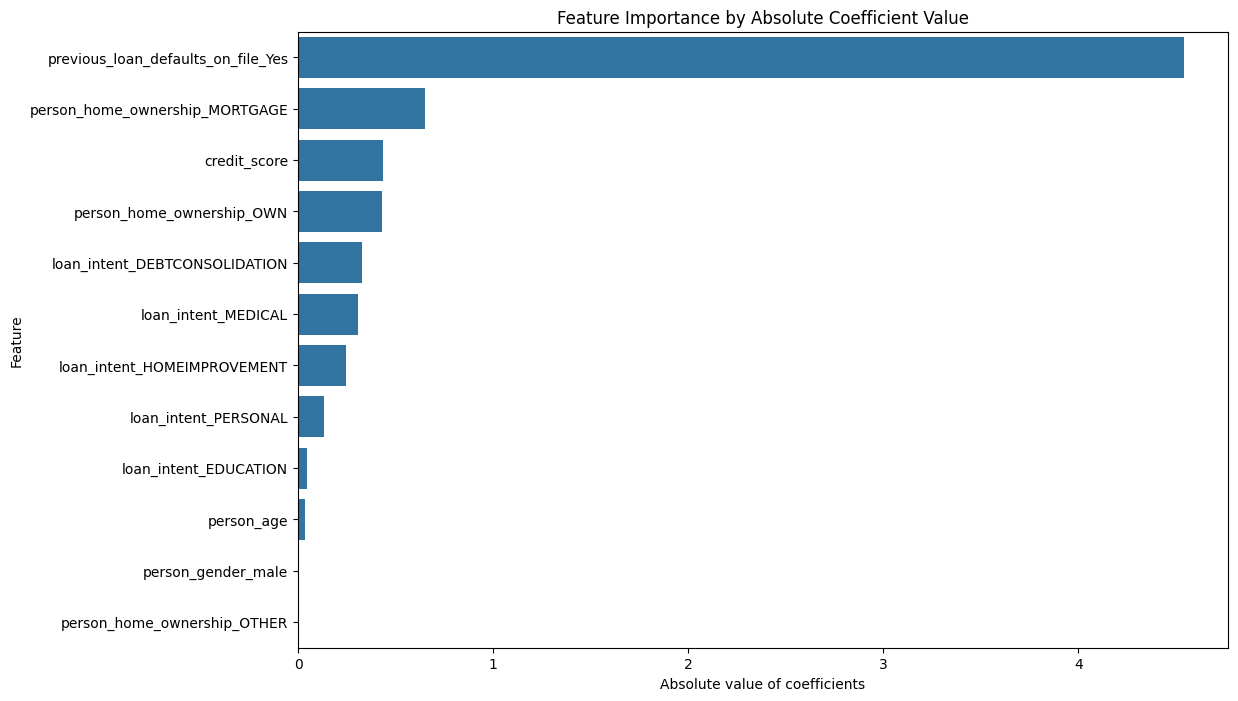

In [224]:
# sort by absolute value of coefficients (highest importance first)
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

# plot all features
plt.figure(figsize=(12, 8))  # adjust the figure size if necessary
sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df)

# labels
plt.title('Feature Importance by Absolute Coefficient Value')
plt.xlabel('Absolute value of coefficients')

# show the plot
plt.show()


In [225]:
import statsmodels.api as sm
#lets see how important these variables are explaining loan status -
X_with_intercept = sm.add_constant(X)  # add a constant column for the intercept

#logistic regression model
logit_model = sm.Logit(y, X_with_intercept)  # y is your target variable
result = logit_model.fit()
print(result.summary()) # we want to see THIS to think about vars and if they are good or not


Optimization terminated successfully.
         Current function value: 0.299017
         Iterations 34
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                44710
Model:                          Logit   Df Residuals:                    44697
Method:                           MLE   Df Model:                           12
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.4366
Time:                        23:36:10   Log-Likelihood:                -13369.
converged:                       True   LL-Null:                       -23727.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  5.4435      0.216   

So looking at this: we know that for each z value in a 95% confidence interval the z value for each coefficient needs to be |1.96| < z to be statistically significant. We can tell that the follow arent statistically significant: gender,person home ownership _other. lets make another model as this one is only explaining 43% of the variance and has a 83% accuracy .

Logistic Regression Equation for Model 1

In [226]:
#lets get the logistic equation out of curiousity:
intercept = result.params[0]
coefficients = result.params[1:]

#logistic regression equation
equation = f"Logit(p) = {intercept:.4f}"  #rounded to 4 decimals

#add the coefficients to the equation in loop to equation
for feature, coef in zip(X.columns, coefficients):
    equation += f" + ({coef:.4f}*{feature})"

print("Logistic Regression Equation:")
print(equation)

Logistic Regression Equation:
Logit(p) = 5.4435 + (0.0203*person_gender_male) + (-0.0085*credit_score) + (-0.0066*person_age) + (-1.3312*person_home_ownership_MORTGAGE) + (-0.1266*person_home_ownership_OTHER) + (-1.6886*person_home_ownership_OWN) + (0.1378*loan_intent_EDUCATION) + (0.3228*loan_intent_PERSONAL) + (0.7675*loan_intent_MEDICAL) + (0.9119*loan_intent_DEBTCONSOLIDATION) + (0.8196*loan_intent_HOMEIMPROVEMENT) + (-48.7168*previous_loan_defaults_on_file_Yes)


<ipython-input-226-977a3a91d6d4>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = result.params[0]


# **Model 2**

Model 2 | From looking at Model 1 : We see gender is pretty statistically insignificant. We also see home other is so maybe we should just take home own and take out other instead...we can also take out previous loan on file it seems to not be super significant.

In [227]:
cleanedfinal2_df = cleaned_df.copy()
cleanedfinal2_df = cleaned_df.drop(columns=['previous_loan_defaults_on_file_No','person_gender_female','person_home_ownership_OTHER','loan_intent_VENTURE','person_education_Master'])#FOR DUMMY VARS WE CANT HAVE ALL CATEGORICAL ANSWERS MUST BE -1
cleanedfinal2_df.head()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_home_ownership_MORTGAGE,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,previous_loan_defaults_on_file_Yes
0,22,71948,0,35000,16,0,3,561,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,21,12282,0,1000,11,0,2,504,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
2,25,12438,3,5500,12,0,3,635,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0
3,23,79753,0,35000,15,0,2,675,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0
4,24,66135,1,35000,14,0,4,586,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [228]:
model2_test_df = cleanedfinal2_df.copy()

#columns i wanna keep
columns_to_keep2 = ['person_age','credit_score','loan_amnt','loan_int_rate','person_home_ownership_MORTGAGE','person_home_ownership_RENT','person_home_ownership_OWN','loan_intent_EDUCATION','loan_intent_PERSONAL','loan_intent_MEDICAL','loan_intent_DEBTCONSOLIDATION','loan_intent_HOMEIMPROVEMENT','loan_status']

#only columns i want to keep!
model2_df = model2_test_df[columns_to_keep2]

#show the resulting DataFrame
print(model2_df.head())

   person_age  credit_score  loan_amnt  loan_int_rate  \
0          22           561      35000             16   
1          21           504       1000             11   
2          25           635       5500             12   
3          23           675      35000             15   
4          24           586      35000             14   

   person_home_ownership_MORTGAGE  person_home_ownership_RENT  \
0                               0                           1   
1                               0                           0   
2                               1                           0   
3                               0                           1   
4                               0                           1   

   person_home_ownership_OWN  loan_intent_EDUCATION  loan_intent_PERSONAL  \
0                          0                      0                     1   
1                          1                      1                     0   
2                          0       

In [229]:
#lets make model 2!!!! we took out gender & prev loan on file andswitched home rent and home other and we now have home rent included as it may be more impactful. we added loan amount and interest rate as well to see if those are important.


#features (X) and target (y , loan_status)
X2 = model2_df.drop(columns=['loan_status'])  # drop 'loan_status' column for features (all other features are independent vars)
y2 = model2_df['loan_status']  # target is 'loan_status'(dependent var)

# split data into training and testing sets (80% train, 20% test as standard)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# standardize the features (X).... need to do this bc we have multiple different variables on diff scales like age vs income etc
scaler2 = StandardScaler()
X_train_scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)


# initialize the Logistic Regression model
model2 = LogisticRegression()

# fit the model to the training data
model2.fit(X_train_scaled2, y_train2)

# make predictions on the test set
y_pred2 = model2.predict(X_test_scaled2)

# evaluate the model
accuracy2 = accuracy_score(y_test2, y_pred2)
print(f'Accuracy: {accuracy2:.4f}')
print('\nConfusion Matrix:')
print(confusion_matrix(y_test2, y_pred2))
print('\nClassification Report:')
print(classification_report(y_test2, y_pred2))

Accuracy: 0.8161

Confusion Matrix:
[[6671  270]
 [1374  627]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6941
           1       0.70      0.31      0.43      2001

    accuracy                           0.82      8942
   macro avg       0.76      0.64      0.66      8942
weighted avg       0.80      0.82      0.79      8942



                          Feature  Coefficient
0                      person_age    -0.071443
1                    credit_score    -0.023858
2                       loan_amnt     0.284240
3                   loan_int_rate     0.833755
4  person_home_ownership_MORTGAGE    -0.623876


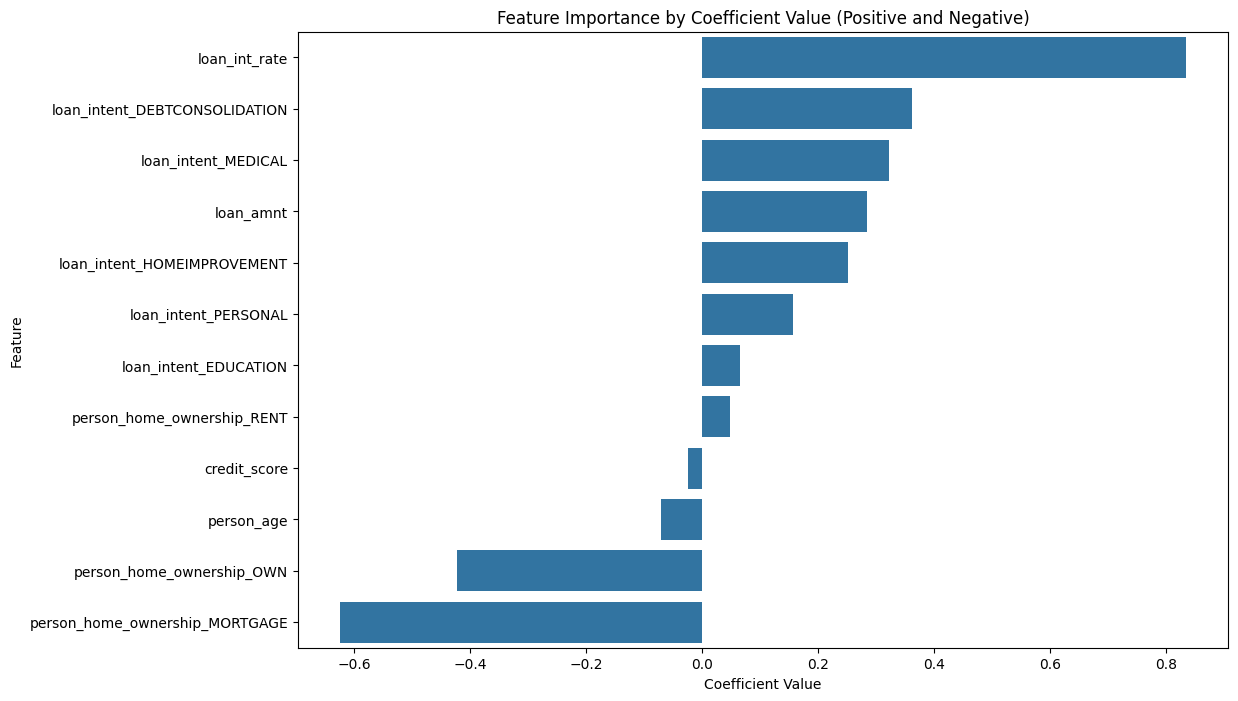

In [230]:
#feature names and their corresponding coefficients
feature_names2 = X2.columns
coefficients2 = model2.coef_[0]

#df to hold feature names and coefficients
coef_df2 = pd.DataFrame({
    'Feature': feature_names2,
    'Coefficient': coefficients2
})

#lets see actual values in df
print(coef_df2.head())

# sort by coefficient value
coef_df2 = coef_df2.sort_values(by='Coefficient', ascending=False)

#showing positive and negative coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df2)
plt.title('Feature Importance by Coefficient Value (Positive and Negative)')
plt.xlabel('Coefficient Value')
plt.show()

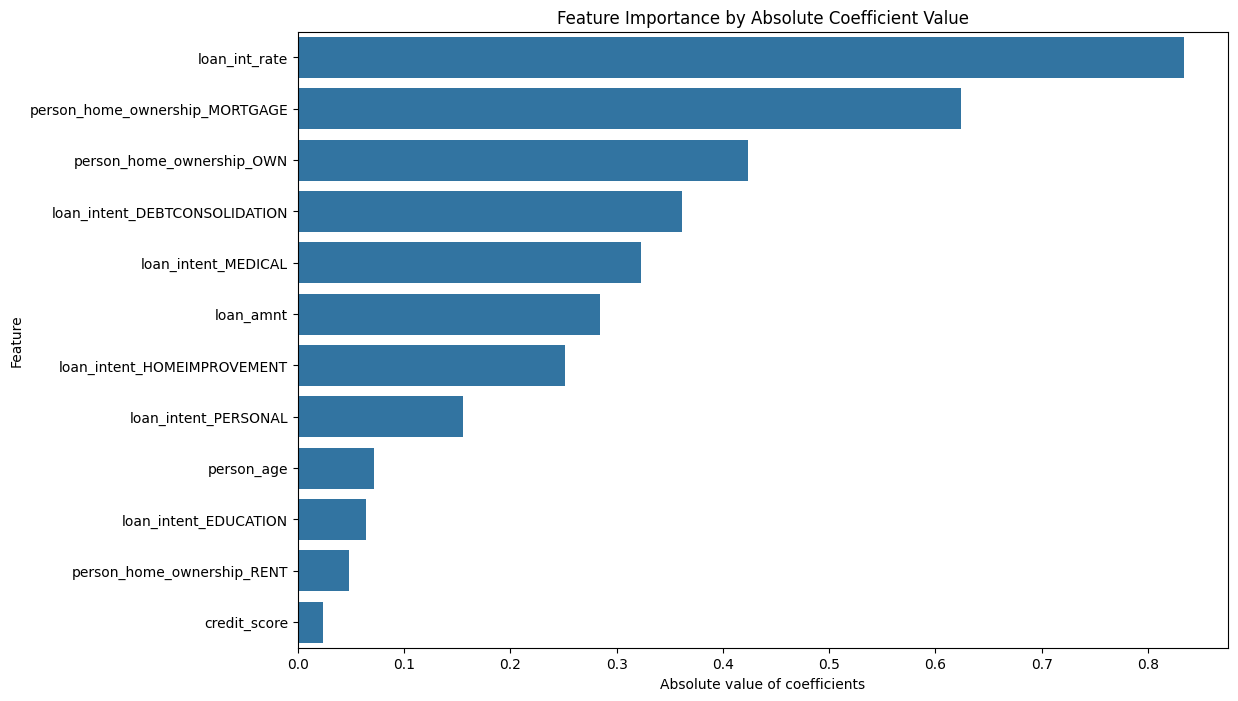

In [231]:
# sort by absolute value of coefficients (highest importance first)
coef_df2['Abs_Coefficient'] = coef_df2['Coefficient'].abs()
coef_df2 = coef_df2.sort_values(by='Abs_Coefficient', ascending=False)

# plot all features
plt.figure(figsize=(12, 8))  # adjust the figure size if necessary
sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df2)

# labels
plt.title('Feature Importance by Absolute Coefficient Value')
plt.xlabel('Absolute value of coefficients')

# show the plot
plt.show()

In [232]:
#lets see how important these variables are explaining loan status -
X_with_intercept2 = sm.add_constant(X2)  # add a constant column for the intercept

#logistic regression model
logit_model2 = sm.Logit(y2, X_with_intercept2)  # y is your target variable
result2 = logit_model2.fit()
print(result2.summary()) # we want to see THIS to think about vars and if they are good or not

Optimization terminated successfully.
         Current function value: 0.429645
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                44710
Model:                          Logit   Df Residuals:                    44697
Method:                           MLE   Df Model:                           12
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.1904
Time:                        23:36:13   Log-Likelihood:                -19209.
converged:                       True   LL-Null:                       -23727.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.3968      0.275    -15.981     

Things to note: why did credit score become insignificant :  > 1.96? was one of the newly added vars (loan amount or loan interst rate) accounting for some of the effect that credit score has? everything else looks good besides the person home ownership is being a bit weird in comparison to model 1 and 2 results..... test it ->

In [233]:
# ok so the person home ownership is giving information gain but it is a bit strange in the regard that only mortgage and own keep being significant but rent and other are not...
#lets test to see if multicollinearity is occuring perhaps to get it out of our model if so
testdf = cleaned_df.copy()
# Assuming your dataframe is 'df' and your dummy columns are 'own', 'rent', 'mortgage', 'other'
correlation_matrix = testdf[['person_home_ownership_OWN', 'person_home_ownership_RENT', 'person_home_ownership_MORTGAGE', 'person_home_ownership_OTHER']].corr()

print(correlation_matrix)


                                person_home_ownership_OWN  \
person_home_ownership_OWN                        1.000000   
person_home_ownership_RENT                      -0.277516   
person_home_ownership_MORTGAGE                  -0.220215   
person_home_ownership_OTHER                     -0.013453   

                                person_home_ownership_RENT  \
person_home_ownership_OWN                        -0.277516   
person_home_ownership_RENT                        1.000000   
person_home_ownership_MORTGAGE                   -0.870800   
person_home_ownership_OTHER                      -0.053197   

                                person_home_ownership_MORTGAGE  \
person_home_ownership_OWN                            -0.220215   
person_home_ownership_RENT                           -0.870800   
person_home_ownership_MORTGAGE                        1.000000   
person_home_ownership_OTHER                          -0.042213   

                                person_home_ownershi

Model 2 - The strongest correlation in your matrix is between RENT and MORTGAGE, with a very high negative correlation (-0.87). This suggests that RENT and MORTGAGE are nearly mutually exclusive which makes sense because if someone rents a home they are unlikely to have a mortgage on that propert and vice versa. So, I am going to prob take out rent and keep mortgage n this case to avoid the multicollinearity......

Model 2 Logistic Equation

In [234]:
#lets get the logistic equation out of curiousity:
intercept2 = result2.params[0]
coefficients2 = result2.params[1:]

#logistic regression equation
equation2 = f"Logit(p) = {intercept2:.4f}"  #rounded to 4 decimals

#add the coefficients to the equation in loop to equation
for feature2, coef2 in zip(X2.columns, coefficients2):
    equation2 += f" + ({coef2:.4f}*{feature2})"

print("Logistic Regression Equation:")
print(equation2)

Logistic Regression Equation:
Logit(p) = -4.3968 + (-0.0130*person_age) + (-0.0004*credit_score) + (0.0000*loan_amnt) + (0.2783*loan_int_rate) + (-1.1797*person_home_ownership_MORTGAGE) + (0.1961*person_home_ownership_RENT) + (-1.5714*person_home_ownership_OWN) + (0.1740*loan_intent_EDUCATION) + (0.4114*loan_intent_PERSONAL) + (0.8203*loan_intent_MEDICAL) + (0.9905*loan_intent_DEBTCONSOLIDATION) + (0.8324*loan_intent_HOMEIMPROVEMENT)


<ipython-input-234-6773e3fde751>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept2 = result2.params[0]


Okay so now we can gather that while we added loan amount it has such a low actual effect lol that maybe we do not even need it in supringly enough and we also need to takeout home rent. lets see this in model 3.

# **Model 3**

In [235]:
model3_test_df = cleanedfinal_df.copy()

#columns i wanna keep
columns_to_keep3 = ['person_age','loan_int_rate','person_home_ownership_MORTGAGE','person_home_ownership_OWN','loan_intent_EDUCATION','loan_intent_PERSONAL','loan_intent_MEDICAL','loan_intent_DEBTCONSOLIDATION','loan_intent_HOMEIMPROVEMENT','loan_status']

#only columns i want to keep!
model3_df = model3_test_df[columns_to_keep3]

#show the resulting DataFrame
print(model3_df.head())

   person_age  loan_int_rate  person_home_ownership_MORTGAGE  \
0          22             16                               0   
1          21             11                               0   
2          25             12                               1   
3          23             15                               0   
4          24             14                               0   

   person_home_ownership_OWN  loan_intent_EDUCATION  loan_intent_PERSONAL  \
0                          0                      0                     1   
1                          1                      1                     0   
2                          0                      0                     0   
3                          0                      0                     0   
4                          0                      0                     0   

   loan_intent_MEDICAL  loan_intent_DEBTCONSOLIDATION  \
0                    0                              0   
1                    0                

In [236]:
#lets make model 2!!!! we took out gender & prev loan on file andswitched home rent and home other and we now have home rent included as it may be more impactful. we added loan amount and interest rate as well to see if those are important.


#features (X) and target (y , loan_status)
X3 = model3_df.drop(columns=['loan_status'])  # drop 'loan_status' column for features (all other features are independent vars)
y3 = model3_df['loan_status']  # target is 'loan_status'(dependent var)

# split data into training and testing sets (80% train, 20% test as standard)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)

# standardize the features (X).... need to do this bc we have multiple different variables on diff scales like age vs income etc
scaler3 = StandardScaler()
X_train_scaled3 = scaler3.fit_transform(X_train3)
X_test_scaled3 = scaler3.transform(X_test3)


# initialize the Logistic Regression model
model3 = LogisticRegression()

# fit the model to the training data
model3.fit(X_train_scaled3, y_train3)

# make predictions on the test set
y_pred3 = model3.predict(X_test_scaled3)

# evaluate the model
accuracy3 = accuracy_score(y_test3, y_pred3)
print(f'Accuracy: {accuracy3:.4f}')
print('\nConfusion Matrix:')
print(confusion_matrix(y_test3, y_pred3))
print('\nClassification Report:')
print(classification_report(y_test3, y_pred3))

Accuracy: 0.8125

Confusion Matrix:
[[6681  260]
 [1417  584]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6941
           1       0.69      0.29      0.41      2001

    accuracy                           0.81      8942
   macro avg       0.76      0.63      0.65      8942
weighted avg       0.80      0.81      0.78      8942



                          Feature  Coefficient
0                      person_age    -0.062226
1                   loan_int_rate     0.867376
2  person_home_ownership_MORTGAGE    -0.604118
3       person_home_ownership_OWN    -0.437497
4           loan_intent_EDUCATION     0.059371


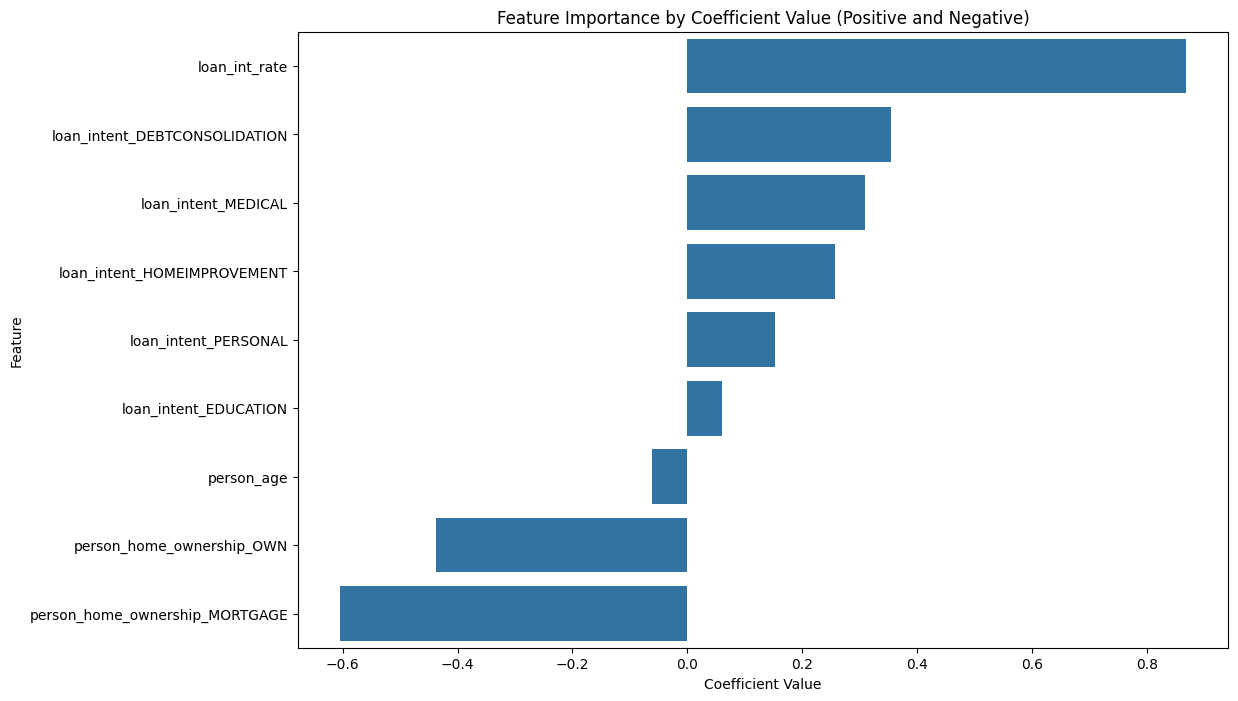

In [237]:
#feature names and their corresponding coefficients
feature_names3 = X3.columns
coefficients3 = model3.coef_[0]

#df to hold feature names and coefficients
coef_df3 = pd.DataFrame({
    'Feature': feature_names3,
    'Coefficient': coefficients3
})

#lets see actual values in df
print(coef_df3.head())

# sort by coefficient value
coef_df3 = coef_df3.sort_values(by='Coefficient', ascending=False)

#showing positive and negative coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df3)
plt.title('Feature Importance by Coefficient Value (Positive and Negative)')
plt.xlabel('Coefficient Value')
plt.show()

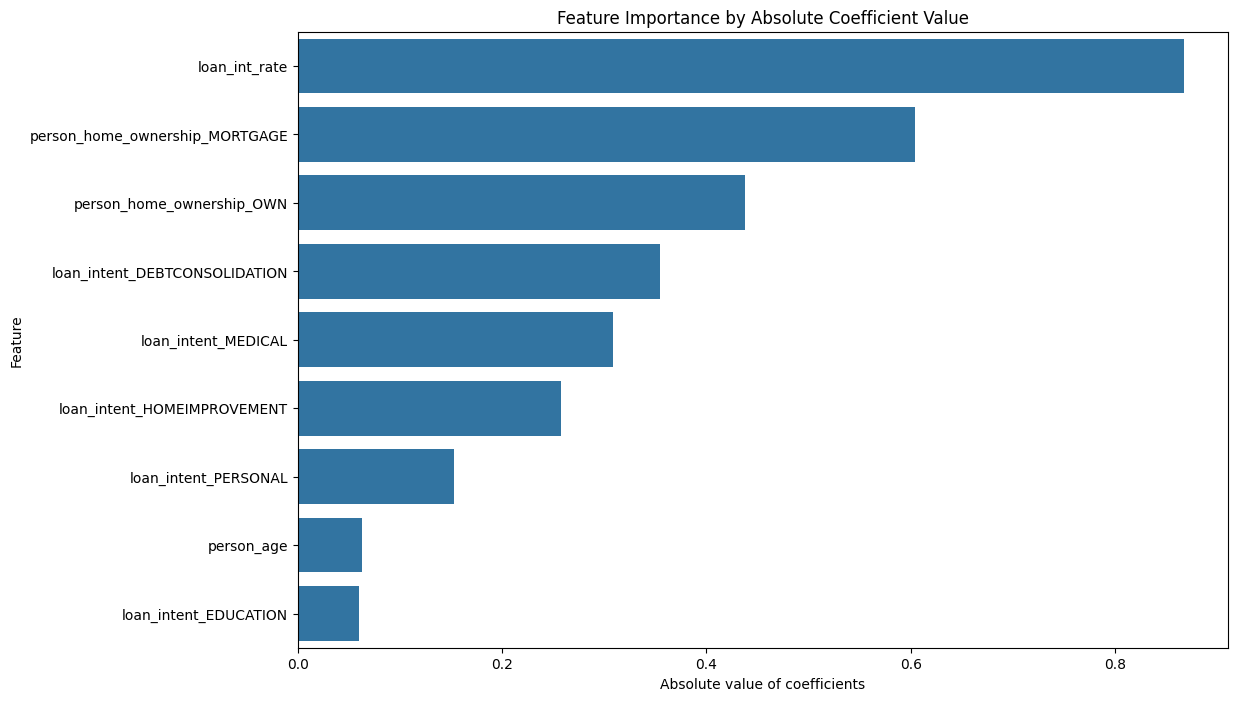

In [238]:
# sort by absolute value of coefficients (highest importance first)
coef_df3['Abs_Coefficient'] = coef_df3['Coefficient'].abs()
coef_df3 = coef_df3.sort_values(by='Abs_Coefficient', ascending=False)

# plot all features
plt.figure(figsize=(12, 8))  # adjust the figure size if necessary
sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df3)

# labels
plt.title('Feature Importance by Absolute Coefficient Value')
plt.xlabel('Absolute value of coefficients')

# show the plot
plt.show()

In [239]:
#lets see how important these variables are explaining loan status -
X_with_intercept3 = sm.add_constant(X3)  # add a constant column for the intercept

#logistic regression model
logit_model3 = sm.Logit(y3, X_with_intercept3)  # y is your target variable
result3 = logit_model3.fit()
print(result3.summary())

Optimization terminated successfully.
         Current function value: 0.435518
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                44710
Model:                          Logit   Df Residuals:                    44700
Method:                           MLE   Df Model:                            9
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.1793
Time:                        23:36:14   Log-Likelihood:                -19472.
converged:                       True   LL-Null:                       -23727.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -4.2023      0.088    -47.616     

In [240]:
#lets get the logistic equation out of curiousity:
intercept3 = result3.params[0]
coefficients3 = result3.params[1:]

#logistic regression equation
equation3 = f"Logit(p) = {intercept3:.4f}"  #rounded to 4 decimals

#add the coefficients to the equation in loop to equation
for feature3, coef3 in zip(X3.columns, coefficients3):
    equation3 += f" + ({coef3:.4f}*{feature3})"

print("Logistic Regression Equation:")
print(equation3)

Logistic Regression Equation:
Logit(p) = -4.2023 + (-0.0114*person_age) + (0.2893*loan_int_rate) + (-1.2399*person_home_ownership_MORTGAGE) + (-1.7276*person_home_ownership_OWN) + (0.1638*loan_intent_EDUCATION) + (0.4036*loan_intent_PERSONAL) + (0.7860*loan_intent_MEDICAL) + (0.9704*loan_intent_DEBTCONSOLIDATION) + (0.8501*loan_intent_HOMEIMPROVEMENT)


<ipython-input-240-57c46b816b98>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept3 = result3.params[0]


Okay statistically this is the best model we have created thus far - but for explaining the variance in the data we have begun to decrease as we do loose information gain from taking out more variables. here technically though our model only has 4 variables which we use to explain loan approval.

# **Model 4**

SO far, we have not put in 	person_emp_exp or any of the person's cb_person_cred_hist_length. now an interesting interactive variable very well could be credit history length*credit score. before we insert an interactive variable though, we should first contemplate adding person emplyment experience in years - this may pick up and make multicolinearity with our age factor but we shall see same with the person credit history length feels like it could go with age as well . lets examine this potentials in model 4 by adding credit hostry length and credit score

so i commented interaction variable as its coeficient was .0002 so we can reject its power to the model as if its coef = 0 then it doesnt explain anything lol

In [241]:
model4_test_df = cleanedfinal_df.copy()

#columns i wanna keep
columns_to_keep4 = ['person_age','loan_int_rate','person_home_ownership_MORTGAGE','person_home_ownership_OWN','loan_intent_EDUCATION','loan_intent_PERSONAL','loan_intent_MEDICAL','loan_intent_DEBTCONSOLIDATION','loan_intent_HOMEIMPROVEMENT','loan_status','credit_score','cb_person_cred_hist_length','previous_loan_defaults_on_file_Yes'] #im adding prev loan even if it was insiginificant i feel like it explained more to the model

#only columns i want to keep!
model4_df = model4_test_df[columns_to_keep4]

#now lets make interaction variable out of curiosity!!!!
# Creating the interaction term 'credit_score * cb_person_cred_hist_length'
#model4_df['credit_score_x_cb_person_cred_hist_length'] = model4_df['credit_score'] * model4_df['cb_person_cred_hist_length']

#show the resulting DataFrame
print(model4_df.head())

   person_age  loan_int_rate  person_home_ownership_MORTGAGE  \
0          22             16                               0   
1          21             11                               0   
2          25             12                               1   
3          23             15                               0   
4          24             14                               0   

   person_home_ownership_OWN  loan_intent_EDUCATION  loan_intent_PERSONAL  \
0                          0                      0                     1   
1                          1                      1                     0   
2                          0                      0                     0   
3                          0                      0                     0   
4                          0                      0                     0   

   loan_intent_MEDICAL  loan_intent_DEBTCONSOLIDATION  \
0                    0                              0   
1                    0                

In [242]:
#features (X) and target (y , loan_status)
X4 = model4_df.drop(columns=['loan_status'])  # drop 'loan_status' column for features (all other features are independent vars)
y4 = model4_df['loan_status']  # target is 'loan_status'(dependent var)

# split data into training and testing sets (80% train, 20% test as standard)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

# standardize the features (X).... need to do this bc we have multiple different variables on diff scales like age vs income etc
scaler4 = StandardScaler()
X_train_scaled4 = scaler4.fit_transform(X_train4)
X_test_scaled4 = scaler4.transform(X_test4)


# initialize the Logistic Regression model
model4 = LogisticRegression()

# fit the model to the training data
model4.fit(X_train_scaled4, y_train4)

# make predictions on the test set
y_pred4 = model4.predict(X_test_scaled4)

# evaluate the model
accuracy4 = accuracy_score(y_test4, y_pred4)
print(f'Accuracy: {accuracy4:.4f}')
print('\nConfusion Matrix:')
print(confusion_matrix(y_test4, y_pred4))
print('\nClassification Report:')
print(classification_report(y_test4, y_pred4))

Accuracy: 0.8583

Confusion Matrix:
[[6353  588]
 [ 679 1322]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      6941
           1       0.69      0.66      0.68      2001

    accuracy                           0.86      8942
   macro avg       0.80      0.79      0.79      8942
weighted avg       0.86      0.86      0.86      8942



WOW! Accuracy of 86% is out best yet! Very nice :D lets look more into this..

                          Feature  Coefficient
0                      person_age    -0.075215
1                   loan_int_rate     0.829935
2  person_home_ownership_MORTGAGE    -0.638312
3       person_home_ownership_OWN    -0.435738
4           loan_intent_EDUCATION     0.075775


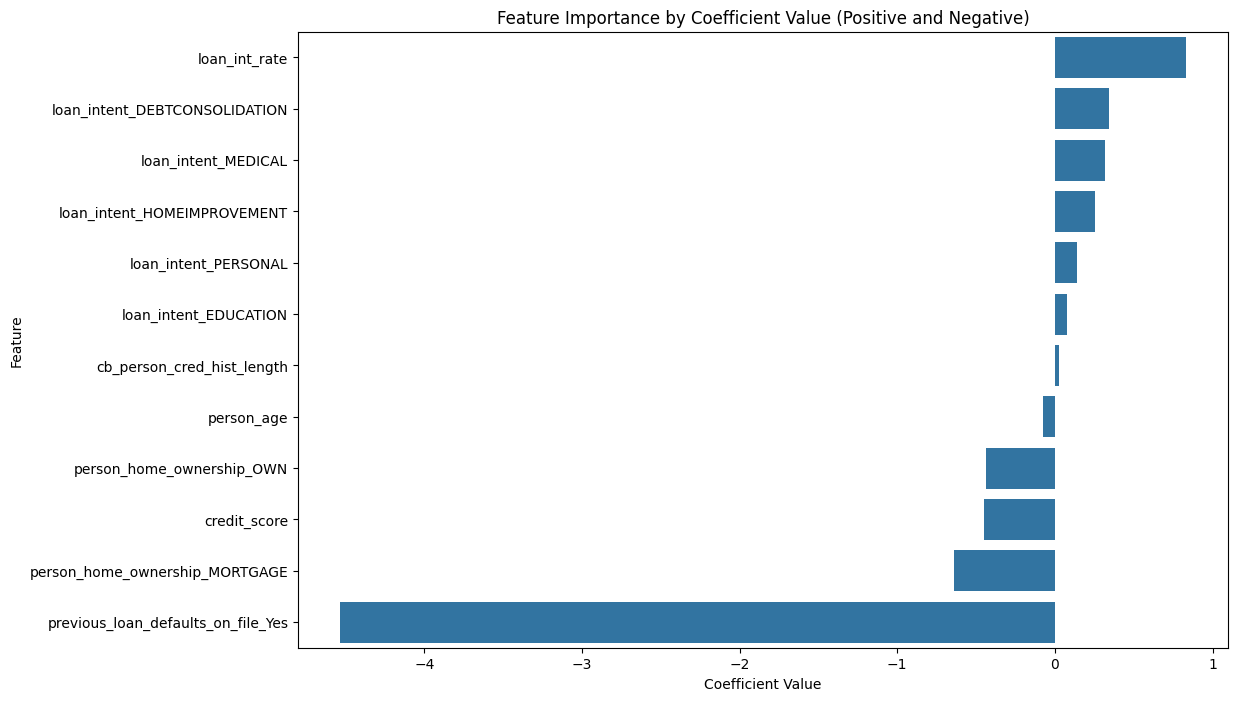

In [243]:
#feature names and their corresponding coefficients
feature_names4 = X4.columns
coefficients4 = model4.coef_[0]

#df to hold feature names and coefficients
coef_df4 = pd.DataFrame({
    'Feature': feature_names4,
    'Coefficient': coefficients4
})

#lets see actual values in df
print(coef_df4.head())

# sort by coefficient value
coef_df4 = coef_df4.sort_values(by='Coefficient', ascending=False)

#showing positive and negative coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df4)
plt.title('Feature Importance by Coefficient Value (Positive and Negative)')
plt.xlabel('Coefficient Value')
plt.show()

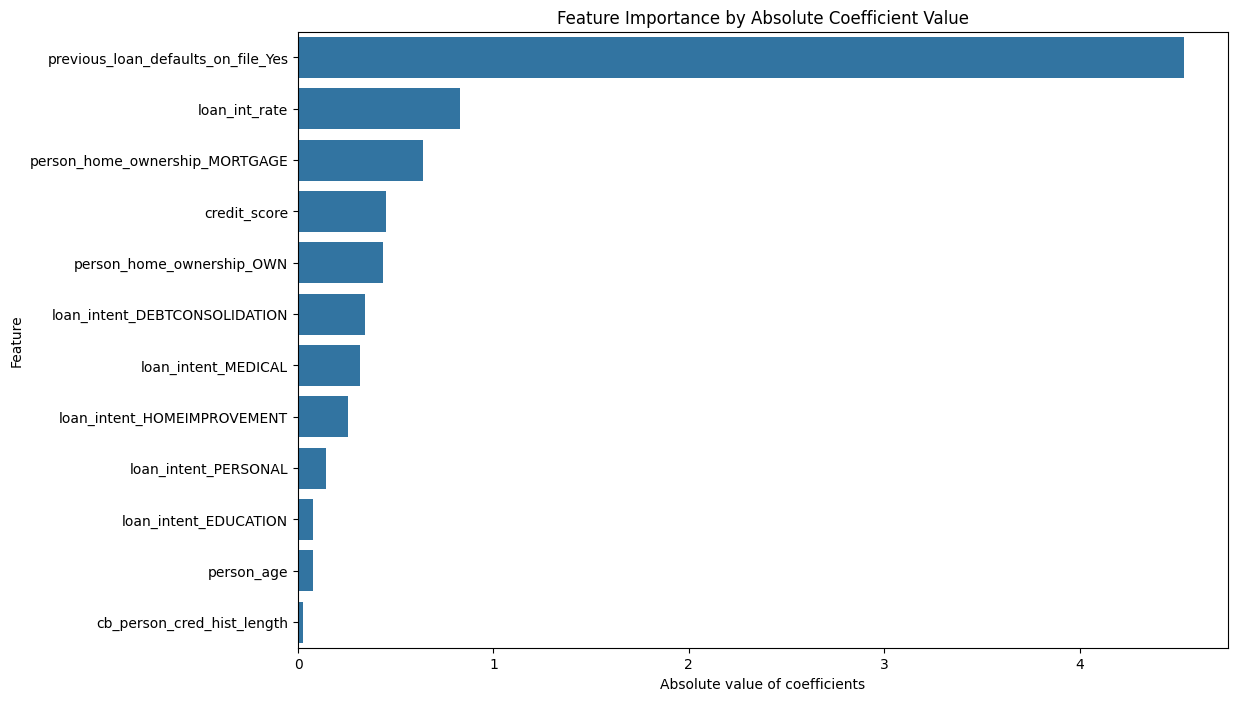

In [244]:
# sort by absolute value of coefficients (highest importance first)
coef_df4['Abs_Coefficient'] = coef_df4['Coefficient'].abs()
coef_df4 = coef_df4.sort_values(by='Abs_Coefficient', ascending=False)

# plot all features
plt.figure(figsize=(12, 8))  # adjust the figure size if necessary
sns.barplot(x='Abs_Coefficient', y='Feature', data=coef_df4)

# labels
plt.title('Feature Importance by Absolute Coefficient Value')
plt.xlabel('Absolute value of coefficients')

# show the plot
plt.show()

interesting it seems that credit score is now significant especially when we have cred histroy length in there with it...

In [245]:
#lets see how important these variables are explaining loan status
X_with_intercept4 = sm.add_constant(X4)

#logistic regression model
logit_model4 = sm.Logit(y4, X_with_intercept4)  # y is your target variable
result4 = logit_model4.fit()
print(result4.summary())

         Current function value: 0.267227
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                44710
Model:                          Logit   Df Residuals:                    44697
Method:                           MLE   Df Model:                           12
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.4965
Time:                        23:36:16   Log-Likelihood:                -11948.
converged:                      False   LL-Null:                       -23727.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.6788      0.249     10.770      0.000       2.191      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ok this is interesting while the interaction var has a coefficient close to 0 so i just commented it out to see. at first cred history length was significant then prevous loan on file became significant when i took out the interaction variable. so the interaction variable must have been accounting for some of the effect of prev loan on file even though before it was statistically insignificant.. very interesting! we will keep the interaction var out but it proved we should keep credit score and cred history both in at same time.  

In [246]:
#lets get the logistic equation out of curiousity:
intercept4 = result4.params[0]
coefficients4 = result4.params[1:]

#logistic regression equation
equation4 = f"Logit(p) = {intercept4:.4f}"  #rounded to 4 decimals

#add the coefficients to the equation in loop to equation
for feature4, coef4 in zip(X4.columns, coefficients4):
    equation4 += f" + ({coef4:.4f}*{feature4})"

print("Logistic Regression Equation:")
print(equation4)

Logistic Regression Equation:
Logit(p) = 2.6788 + (-0.0096*person_age) + (0.2739*loan_int_rate) + (-1.3015*person_home_ownership_MORTGAGE) + (-1.7094*person_home_ownership_OWN) + (0.1956*loan_intent_EDUCATION) + (0.3467*loan_intent_PERSONAL) + (0.7791*loan_intent_MEDICAL) + (0.9358*loan_intent_DEBTCONSOLIDATION) + (0.8411*loan_intent_HOMEIMPROVEMENT) + (-0.0088*credit_score) + (0.0004*cb_person_cred_hist_length) + (-10.2895*previous_loan_defaults_on_file_Yes)


<ipython-input-246-d14ed78d1500>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept4 = result4.params[0]


# **Model 5**

Model 5 | We are adding the last var we havent added yet which is the person's work experience.... may add interaction variable timing this with age to see if it does anything lol

In [247]:
model5_test_df = cleanedfinal_df.copy()

#columns i wanna keep
columns_to_keep5 = ['person_age','loan_int_rate','person_home_ownership_MORTGAGE','person_home_ownership_OWN','loan_intent_EDUCATION','loan_intent_PERSONAL','loan_intent_MEDICAL','loan_intent_DEBTCONSOLIDATION','loan_intent_HOMEIMPROVEMENT','loan_status','credit_score','cb_person_cred_hist_length','previous_loan_defaults_on_file_Yes','person_emp_exp'] #lastly adding the person's employee experience bc never added it in yet

#only columns i want to keep!
model5_df = model5_test_df[columns_to_keep5].copy()
#interact age & person_emp_exp
#model5_df['credit_age_x_person_emp_exp'] = model5_df['person_age'] * model5_df['person_emp_exp']
#ok nvm this was a terrible idea there is perfect multicollinearity doing this lol nvm not a good idea 0-0

#show the resulting DataFrame
print(model5_df.head())

   person_age  loan_int_rate  person_home_ownership_MORTGAGE  \
0          22             16                               0   
1          21             11                               0   
2          25             12                               1   
3          23             15                               0   
4          24             14                               0   

   person_home_ownership_OWN  loan_intent_EDUCATION  loan_intent_PERSONAL  \
0                          0                      0                     1   
1                          1                      1                     0   
2                          0                      0                     0   
3                          0                      0                     0   
4                          0                      0                     0   

   loan_intent_MEDICAL  loan_intent_DEBTCONSOLIDATION  \
0                    0                              0   
1                    0                

In [248]:
#features (X) and target (y , loan_status)
X5 = model5_df.drop(columns=['loan_status'])  # drop 'loan_status' column for features (all other features are independent vars)
y5 = model5_df['loan_status']  # target is 'loan_status'(dependent var)

# split data into training and testing sets (80% train, 20% test as standard)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size=0.2, random_state=42)

# standardize the features (X).... need to do this bc we have multiple different variables on diff scales like age vs income etc
scaler5 = StandardScaler()
X_train_scaled5 = scaler5.fit_transform(X_train5)
X_test_scaled5 = scaler5.transform(X_test5)


# initialize the Logistic Regression model
model5 = LogisticRegression()

# fit the model to the training data
model5.fit(X_train_scaled5, y_train5)

# make predictions on the test set
y_pred5 = model5.predict(X_test_scaled5)

# evaluate the model
accuracy5 = accuracy_score(y_test5, y_pred5)
print(f'Accuracy: {accuracy5:.4f}')
print('\nConfusion Matrix:')
print(confusion_matrix(y_test5, y_pred5))
print('\nClassification Report:')
print(classification_report(y_test5, y_pred5))

Accuracy: 0.8575

Confusion Matrix:
[[6349  592]
 [ 682 1319]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91      6941
           1       0.69      0.66      0.67      2001

    accuracy                           0.86      8942
   macro avg       0.80      0.79      0.79      8942
weighted avg       0.86      0.86      0.86      8942



hmm didnt change accuracy lol well well well prob didnt do or add anything i suppose

                          Feature  Coefficient
0                      person_age     0.019313
1                   loan_int_rate     0.830429
2  person_home_ownership_MORTGAGE    -0.638581
3       person_home_ownership_OWN    -0.434922
4           loan_intent_EDUCATION     0.075014


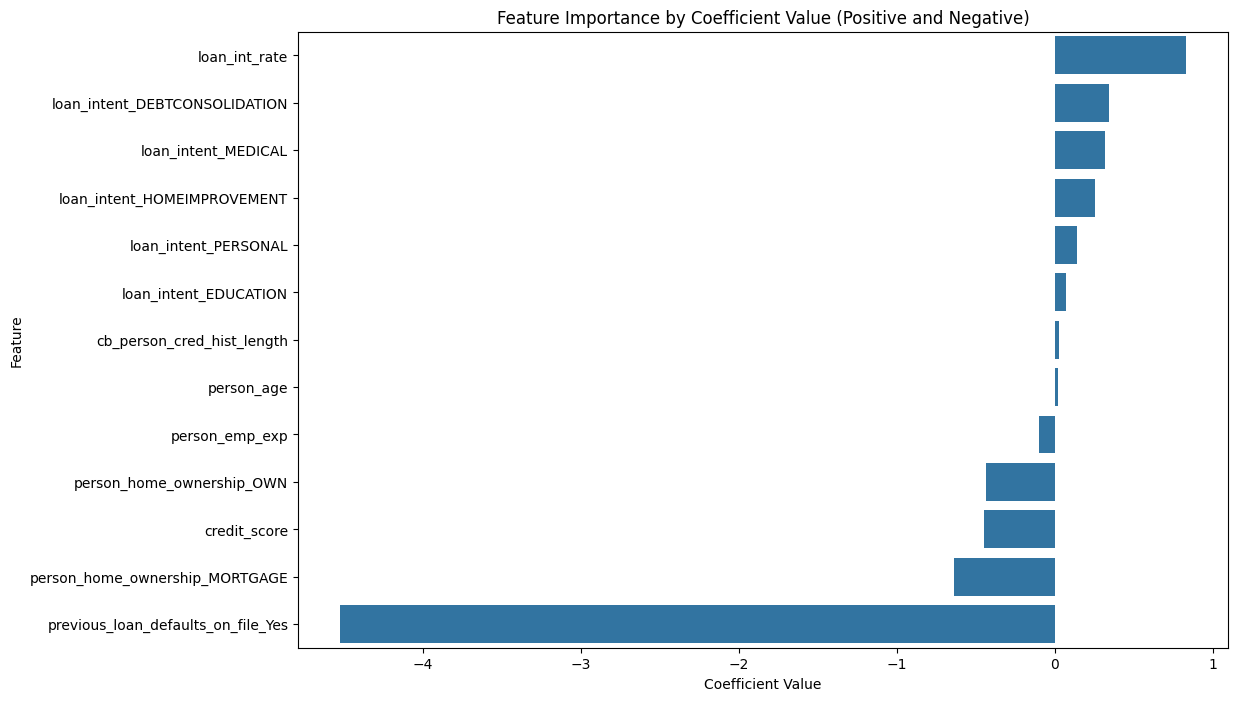

In [249]:
#feature names and their corresponding coefficients
feature_names5 = X5.columns
coefficients5 = model5.coef_[0]

#df to hold feature names and coefficients
coef_df5 = pd.DataFrame({
    'Feature': feature_names5,
    'Coefficient': coefficients5
})

#lets see actual values in df
print(coef_df5.head())

# sort by coefficient value
coef_df5 = coef_df5.sort_values(by='Coefficient', ascending=False)

#showing positive and negative coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df5)
plt.title('Feature Importance by Coefficient Value (Positive and Negative)')
plt.xlabel('Coefficient Value')
plt.show()

In [250]:
#skipping to this to see results:

#lets see how important these variables are explaining loan status
X_with_intercept5 = sm.add_constant(X5)

#logistic regression model
logit_model5 = sm.Logit(y5, X_with_intercept5)  # y is your target variable
result5 = logit_model5.fit()
print(result5.summary())

         Current function value: 0.267283
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                44710
Model:                          Logit   Df Residuals:                    44696
Method:                           MLE   Df Model:                           13
Date:                Fri, 22 Nov 2024   Pseudo R-squ.:                  0.4964
Time:                        23:36:17   Log-Likelihood:                -11950.
converged:                      False   LL-Null:                       -23727.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  2.4512      0.316      7.756      0.000       1.832      

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


mmmm adding person emp exp didnt really do anything it seems like model 4 was best! :D probably will conclude with model 4 then for visualization i suppose...

# **Model 4 Visualization**


first some features then we should do the results:

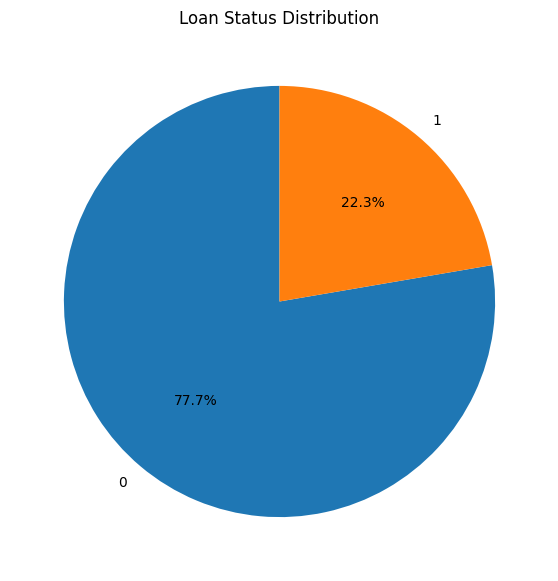

In [251]:
#pie chart for 'loan_status'
loan_status_counts = model4_df['loan_status'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Loan Status Distribution')
plt.show()


so this showing we guessed 77% no and 23% yes for our model with our testing data.

<ipython-input-252-7b5c119653f8>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(model4_df['credit_score'], model4_df['loan_status'], alpha=0.6, edgecolors='w', cmap='coolwarm')


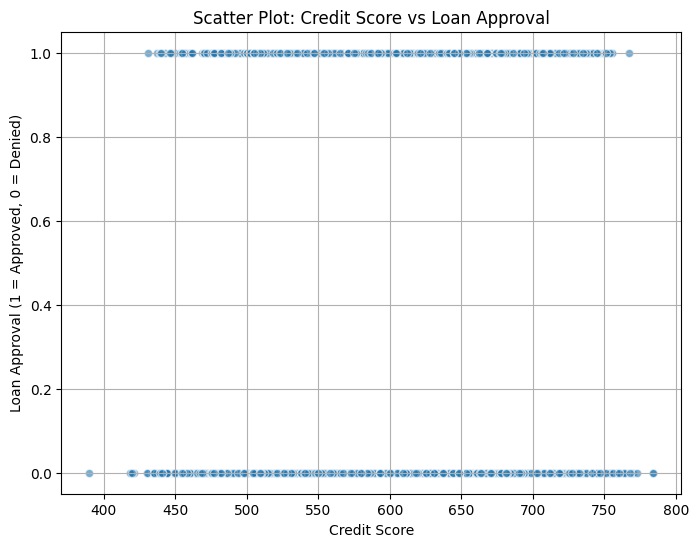

In [252]:
#scatter plot between 'credit_score' and 'loan_status' bc i think it would be interesting.. would do credit scroe vs prev loan on file but bth 0 or 1 so they are boring on graph
plt.figure(figsize=(8, 6))
plt.scatter(model4_df['credit_score'], model4_df['loan_status'], alpha=0.6, edgecolors='w', cmap='coolwarm')
plt.title('Scatter Plot: Credit Score vs Loan Approval')
plt.xlabel('Credit Score')
plt.ylabel('Loan Approval (1 = Approved, 0 = Denied)')
plt.grid(True)
plt.show()
#well this is kind of boring as well actually visually haha but it does i guess show it doesnt matter that much ur credit score to get approved or not approved


result visualizations of the logistic regression!

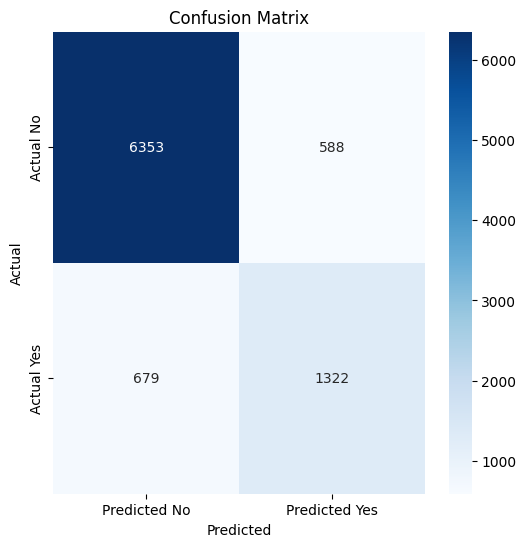

In [253]:
#confusion matrix for model 4
cm = confusion_matrix(y_test4, y_pred4)

#heatmap of the confusion matrix to show how accurate we were :)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


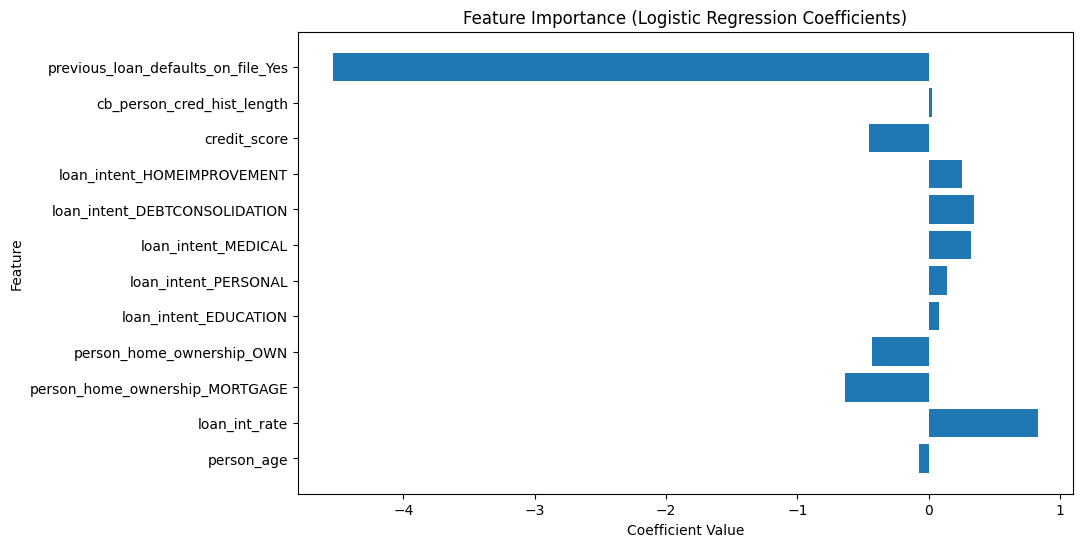

In [255]:
feature_names = X_train4.columns
coefficients = model4.coef_[0]

#we are just gonna plot this again to visually see how each one impacts loan approval to see the different relationships going on
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


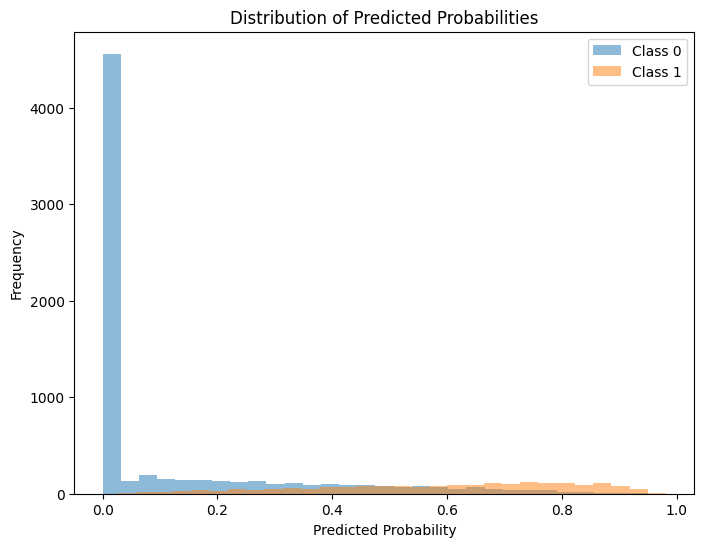

In [258]:
#histogram of predicted probabilities
plt.figure(figsize=(8, 6))
y_prob4 = model4.predict_proba(X_test_scaled4)[:, 1]  #put here bc weird error of size mismatch ugh
plt.hist(y_prob4[y_test4 == 0], bins=30, alpha=0.5, label='Class 0')
plt.hist(y_prob4[y_test4 == 1], bins=30, alpha=0.5, label='Class 1')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()


SO this is kind of interesting results.... we have here: Predicted probability close to 0: The model is confident that the instance belongs to the negative class (loan not approved, no default) this is obviously our BIGGEST scenario. Predicted probability close to 1: The model is confident that the instance belongs to the positive class (loan approved, default).This is sadly less common but maybe this also shows banks dont approve loans most of the time haha. Predicted probability near 0.5: The model is unsure whether the instance belongs to the positive or negative class meaning it is making a more uncertain prediction. On the bright side, its looking like the .5 bins are close to the lower amount ish so maybe this is not too bad?

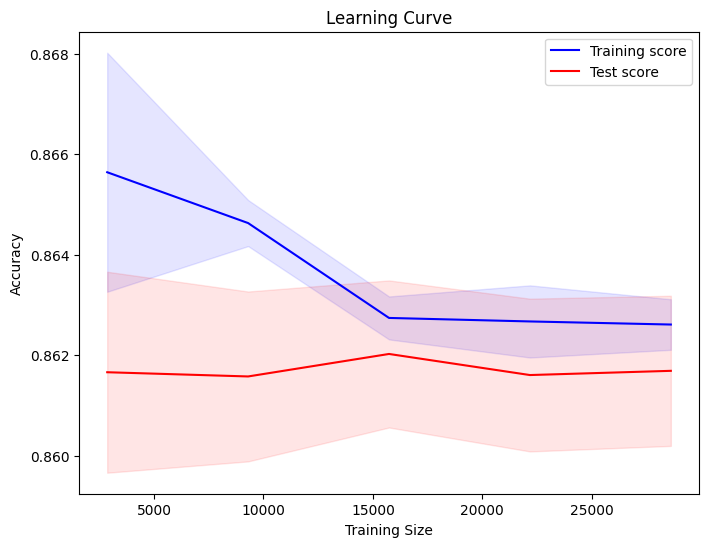

In [259]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model4, X_train_scaled4, y_train4, cv=5, scoring='accuracy', n_jobs=-1
)

#mean and standard deviation of training and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_std = test_scores.std(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training score', color='b')
plt.plot(train_sizes, test_mean, label='Test score', color='r')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='b')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='r')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Wanted to plot the learning curve with training score vs test score because we see they end up converging at the end to be generally close to the same acuracy of .8662 roughly which is cool to see!

# **Conclusion**

In Conclusion, we see that model four with approx 86% accuracy is our best model for predicting if someone will be approved with their loan. This model has the independent variables of : age, loan interest rate, person's home ownership status, loan intent, credit score, credit history length, and if there is a previous loan on file to explain our dependent variable loan status. We find the highest weighing coefficient is if there is a previous loan on file which negatively impacts if the loan is approved or not.

**Logit(p)=2.6788+(−0.0096×person_age)+(0.2739×loan_int_rate)+(−1.3015×person_home_ownership_MORTGAGE)+(−1.7094×person_home_ownership_OWN)+(0.1956×loan_intent_EDUCATION)+(0.3467×loan_intent_PERSONAL)+(0.7791×loan_intent_MEDICAL)+(0.9358×loan_intent_DEBTCONSOLIDATION)+(0.8411×loan_intent_HOMEIMPROVEMENT)+(−0.0088×credit_score)+(0.0004×cb_person_cred_hist_length)+(−10.2895×previous_loan_defaults_on_file_Yes)**